Importing library



In [249]:
import pandas as pd
import numpy as np

In [250]:
crime=pd.read_csv("/content/drive/MyDrive/clustering assignment/crime_data.csv")

In [251]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [252]:
crime.shape

(50, 5)

In [253]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [254]:
crime.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [255]:
#no null values
#drop column 0 
crime1=crime.iloc[:,1:]
crime1.head(2)

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5


In [256]:
#normalizing data
from sklearn.preprocessing import scale
crime_ary=crime1.values

In [257]:
norm_crime1=scale(crime_ary)

In [258]:
norm_crime1

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

**Hclustering**







In [259]:
#importing library for Hclustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

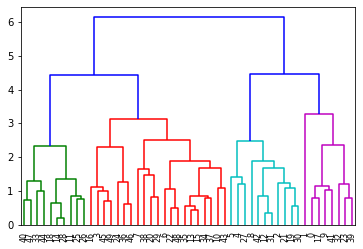

In [260]:
# create dendrogram{method="complete}
dendrogram=sch.dendrogram(sch.linkage(norm_crime1, method="complete"))

In [261]:
#creating cluster
hc=AgglomerativeClustering(n_clusters=4,affinity="euclidean",linkage="complete")

In [262]:
y_hc=hc.fit_predict(norm_crime1)
y_hc

array([0, 0, 2, 1, 2, 2, 1, 1, 2, 0, 1, 3, 2, 1, 3, 1, 1, 0, 3, 2, 1, 2,
       1, 0, 1, 3, 3, 2, 3, 1, 2, 2, 0, 3, 1, 1, 1, 1, 1, 0, 3, 0, 2, 1,
       3, 1, 1, 3, 1, 1])

In [263]:
import sklearn
sklearn.metrics.silhouette_score(norm_crime1,y_hc)

0.31595507426164543

In [264]:
hcrime=crime.copy()
hcrime["hcluster"]=y_hc
hcrime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,hcluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,2


In [265]:
hcrime["hcluster"].value_counts()

1    21
2    11
3    10
0     8
Name: hcluster, dtype: int64

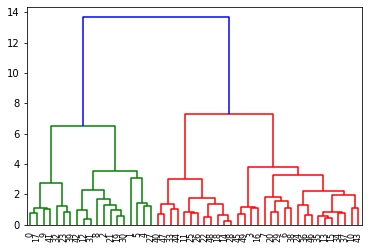

In [266]:
# create dendrogram {method=ward}
dendrogram=sch.dendrogram(sch.linkage(norm_crime1, method="ward"))

In [267]:
#creating cluster
hc=AgglomerativeClustering(n_clusters=4,affinity="euclidean",linkage="ward")
y_hc=hc.fit_predict(norm_crime1)
y_hc

array([3, 1, 1, 0, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 0, 3, 2, 1, 0, 1,
       2, 3, 0, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0])

In [268]:
#method=ward shows 4 cluster

In [269]:
hcrime=crime.copy()
hcrime["hcluster"]=y_hc
hcrime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,hcluster
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1


In [270]:
hcrime["hcluster"].value_counts()

0    19
2    12
1    12
3     7
Name: hcluster, dtype: int64

In [271]:
import sklearn
sklearn.metrics.silhouette_score(norm_crime1,y_hc)

0.3370187183556962

In [272]:
#from the silhouette score of Hcluster by dendrogram {method=ward} & linkage="ward" score is 0.33 
#clustering model is better for us

**KMeans clustering**

In [273]:
from sklearn.cluster import KMeans


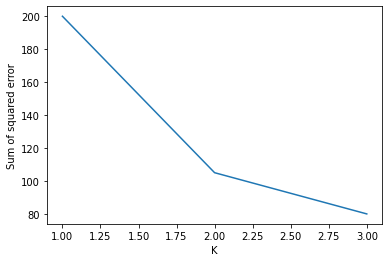

In [274]:
sse=[]
k_rng =range(1,4)
for k in k_rng:
    km =KMeans(n_clusters=k)
    km.fit(norm_crime1)
    sse.append(km.inertia_)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

Selecting 2 clusters from the above scree plot 

In [275]:
model=KMeans(n_clusters=2,random_state=30).fit(norm_crime1)
model.labels_ 

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int32)

In [276]:
kcrime=crime.copy()
kcrime["kcluster"]=model.labels_ 
kcrime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,kcluster
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1


In [277]:
kcrime["kcluster"].value_counts()

0    30
1    20
Name: kcluster, dtype: int64

In [278]:
sklearn.metrics.silhouette_score(norm_crime1,model.labels_ )

0.4084890326217641

**DBSCAN**

In [279]:
#import libray for DBSCAN
from sklearn.cluster import DBSCAN

In [280]:
# eps =0.40

In [281]:
dbscan=DBSCAN(eps=0.40,min_samples=5)
dbscan.fit(norm_crime1)

DBSCAN(eps=0.4)

In [282]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [283]:
#all r outliers are given the label -1,when eps=0.40

In [284]:
# eps =0.70
dbscan=DBSCAN(eps=0.70,min_samples=5)
dbscan.fit(norm_crime1)

DBSCAN(eps=0.7)

In [285]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1,
        0,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1])

In [286]:
dcrime=crime.copy()
dcrime["dcluster"]=dbscan.labels_
dcrime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,dcluster
0,Alabama,13.2,236,58,21.2,-1
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,-1
3,Arkansas,8.8,190,50,19.5,-1
4,California,9.0,276,91,40.6,-1


In [287]:
dcrime["dcluster"].value_counts()

-1    43
 0     7
Name: dcluster, dtype: int64

In [288]:
import sklearn
sklearn.metrics.silhouette_score(norm_crime1,dbscan.labels_)

-0.11411918739912119

comparing silhouette score of H,k & DBSCAN It is cleard that the h & k are good for us beacuse of score of both is in +ve and closer to one and DBSCAN score is in -ve so it is worst model.